In [114]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as layers
from tensorflow.keras.layers import GlobalMaxPooling2D, Activation, Dense, Conv1D, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, GlobalMaxPooling1D
from tensorflow.keras import optimizers
import itertools
from sklearn.utils import shuffle

%matplotlib inline


In [115]:
train_datas = []
eval_datas = []
for i in range(1,9):
    train_datas.append(np.load('bcidatasetIV2a/A0'+str(i)+'T.npz'))
for i in range(1,9):
    eval_datas.append(np.load('bcidatasetIV2a/A0'+str(i)+'E.npz'))
    
primary_motor_cortex_electrodes=[7,8,9,10,11]
EOG_electrodes=[22,23,24]
############################################
event_codes=[769,770,771,772]
event_names=['left','right','foot','tounge']

event_codes=[769,770]
event_names=['left','right']
############################################



In [116]:
def showEvent(X,y):
    plt.rcParams["figure.figsize"] = [17, 2]
    fig, (c1, c2, c3, c4, c5) = plt.subplots(1, 5)
    fig.suptitle(event_names[np.where(y==1)[0][0]])
    c1.plot(X[:,0])
    c2.plot(X[:,1])
    c3.plot(X[:,2])
    c4.plot(X[:,3])
    c5.plot(X[:,4])

In [117]:
X=[]
y=[]
for data in train_datas:
    max_length=0
    signal = data['s']
    
    #REMOVE EOG
    signal=np.delete(signal,EOG_electrodes,axis=1)
    
    #USE ONLY ELECTRODES OVER MOTOR CORTEX
    signal = signal[:,primary_motor_cortex_electrodes]

    #FILTER BANDWIDTH
    signal=np.clip(signal,-20,20)
    
    signal=np.divide(signal, 20)
    #signal+=0.5
    
    
    event_count=data['etyp'].shape[0]
    
    for x in range(event_count): 
        epos = data['epos'].T[0, x]
        edur = data['edur'].T[0, x]
        etype= data['etyp'].T[0, x]
        if edur>10:
            if int(etype) in event_codes:
                trial = signal[epos:epos+edur]
                X.append(trial)
                y.append(event_codes.index(etype))
                
    #FIRST PATIENT ONLY
    break       
X=np.array(X)
#X=np.array(list(itertools.zip_longest(*X, fillvalue=0))).T
#X = X / np.linalg.norm(X)

y=to_categorical(np.array(y))
print(X.shape)
print(y.shape)


(144, 313, 5)
(144, 2)


In [118]:
DATA_LIMIT=13
#X=X[:DATA_LIMIT]
#y=y[:DATA_LIMIT]

C:\Users\Nemes\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


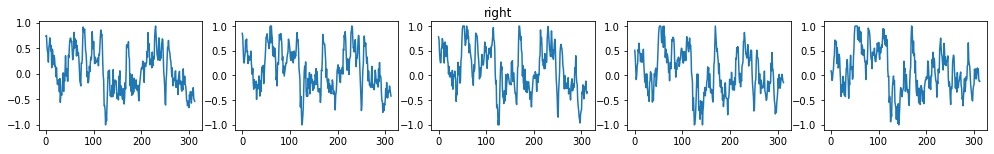

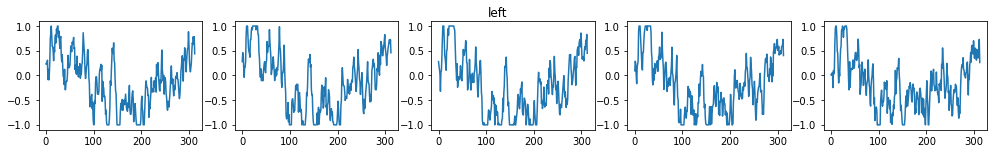

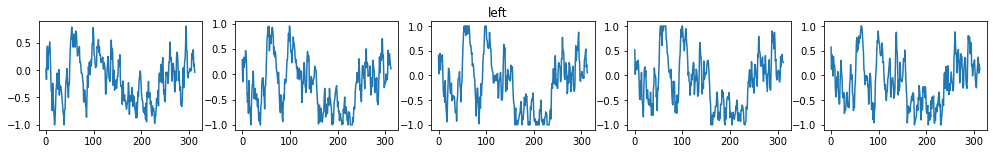

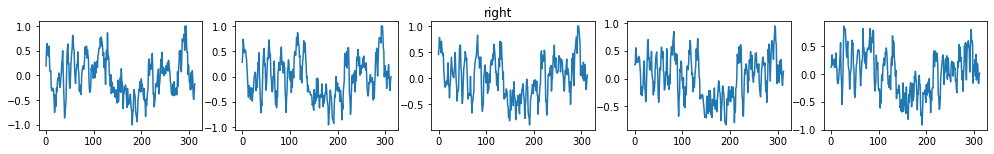

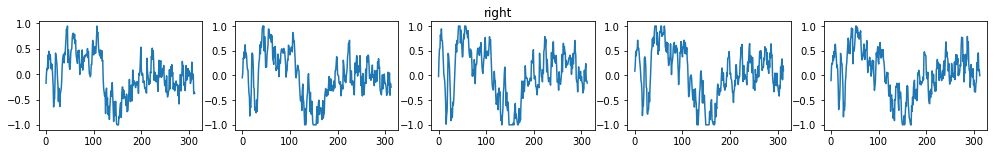

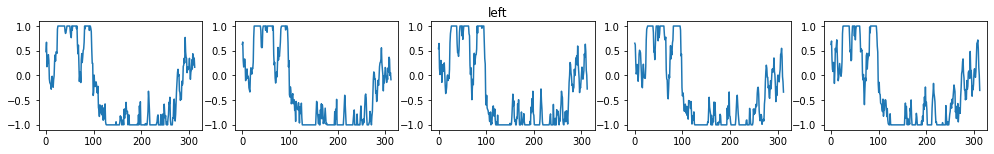

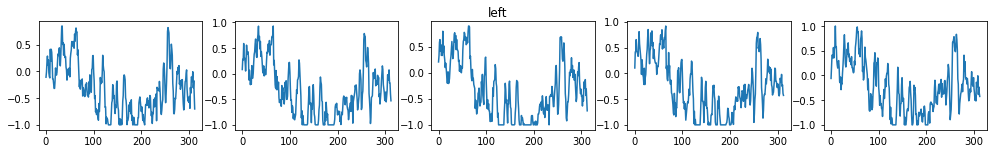

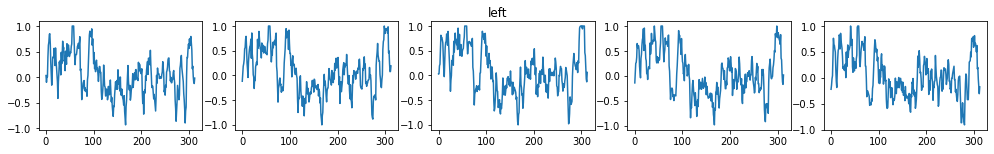

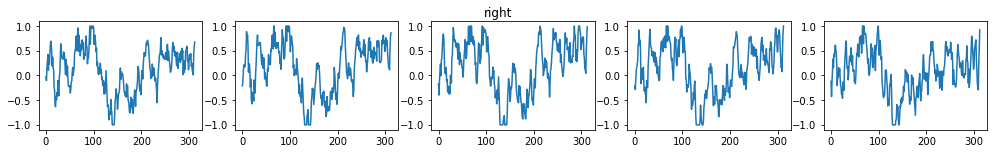

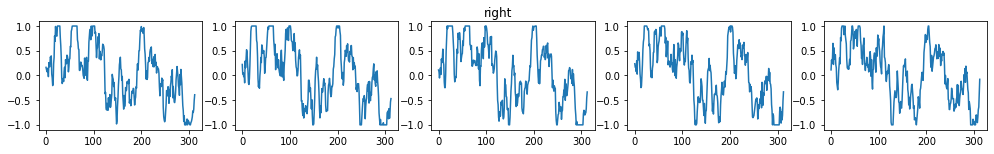

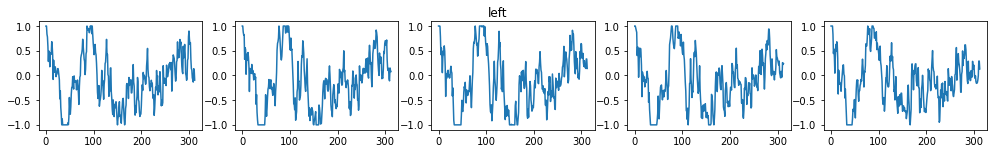

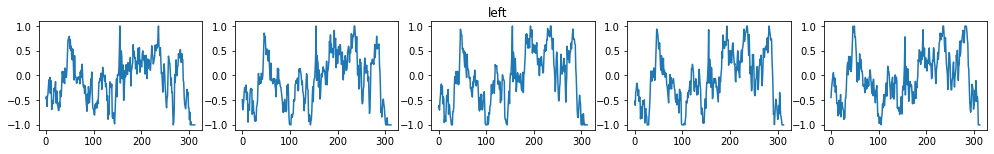

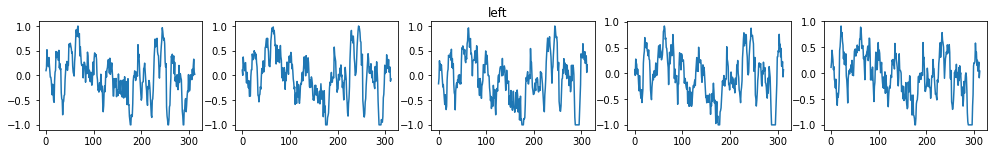

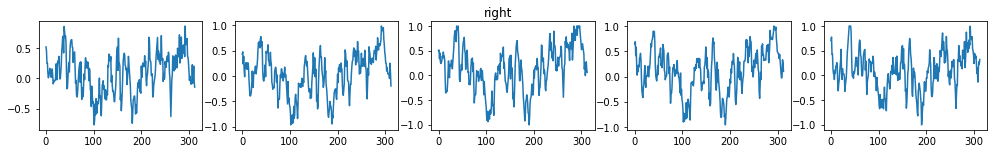

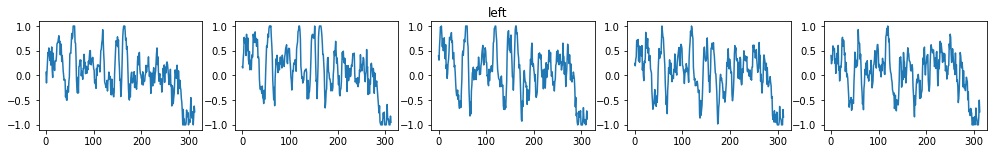

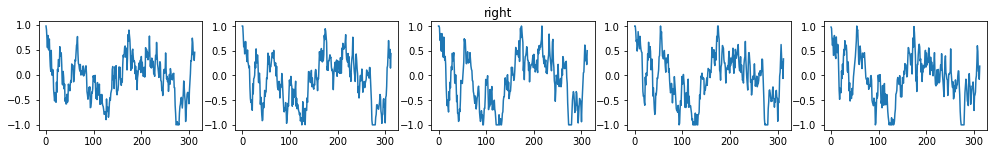

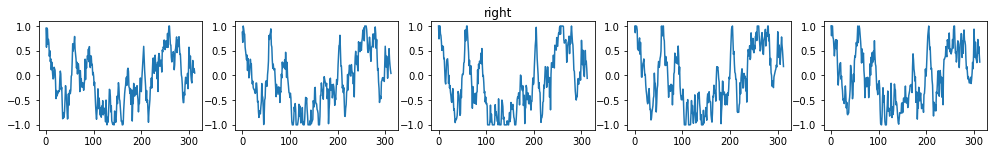

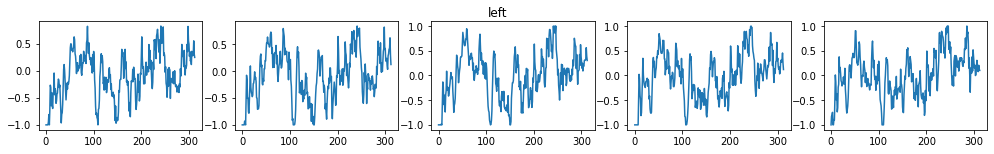

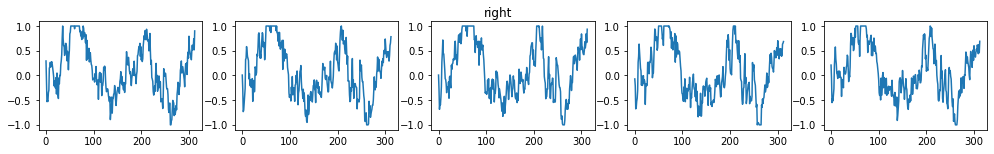

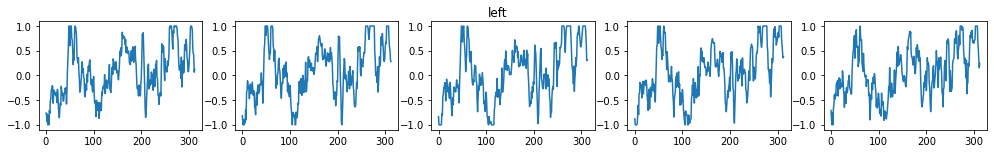

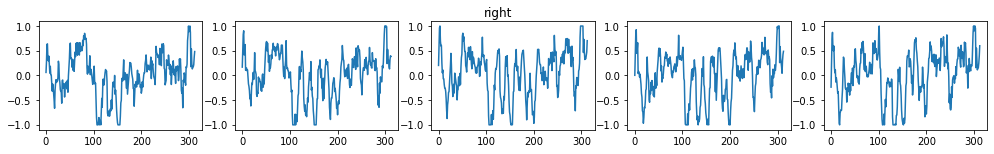

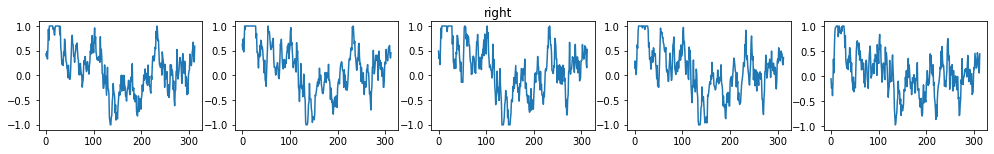

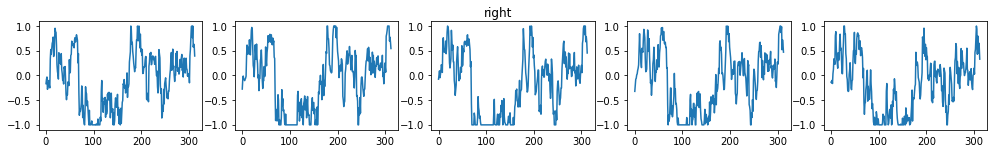

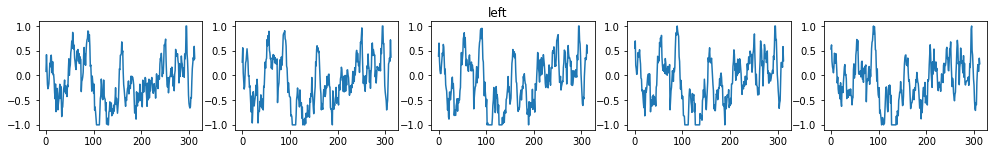

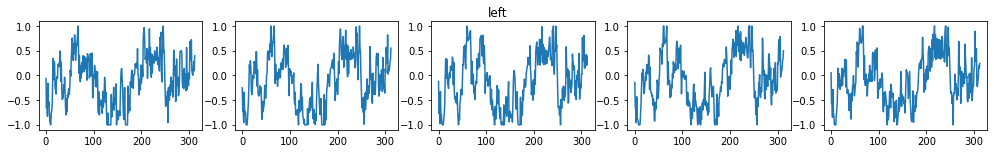

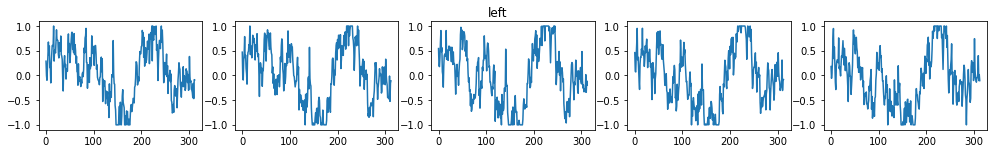

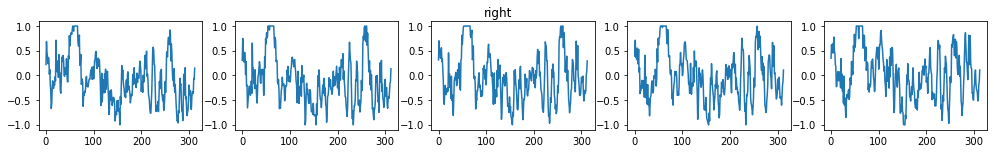

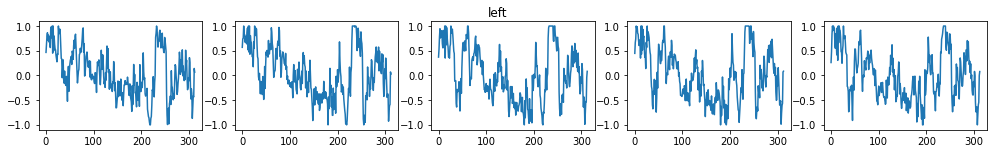

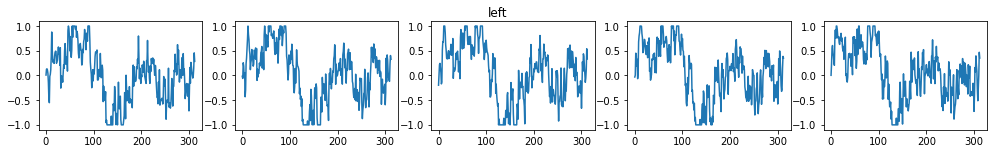

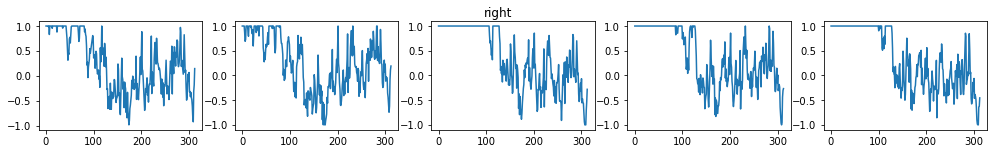

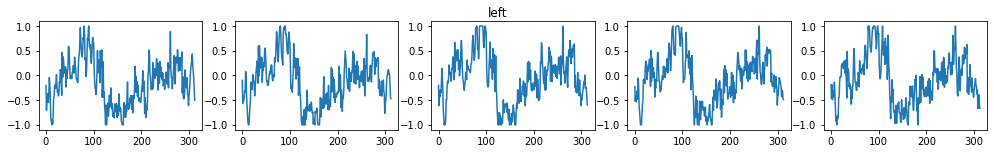

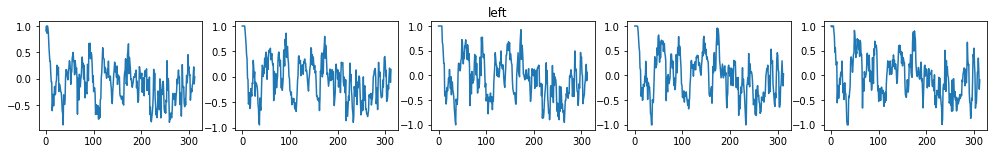

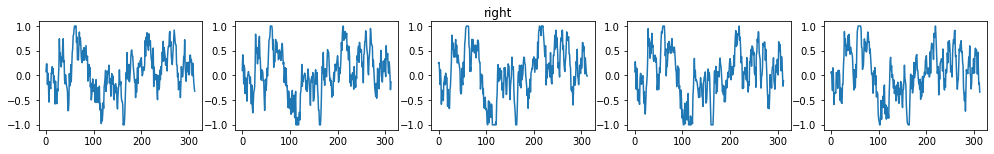

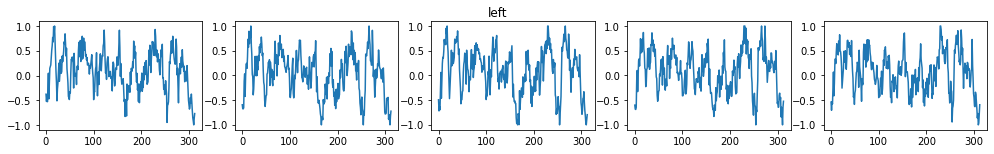

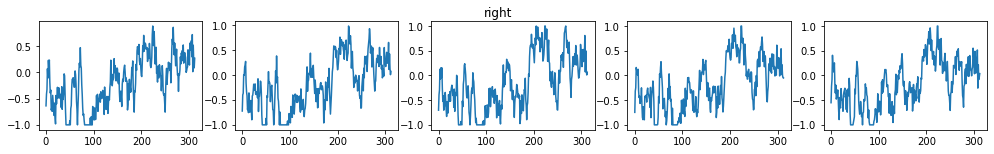

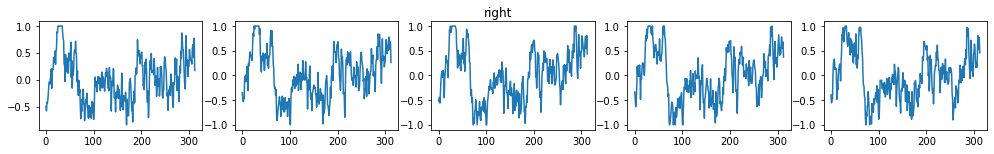

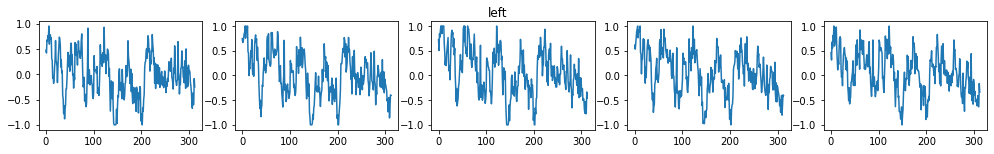

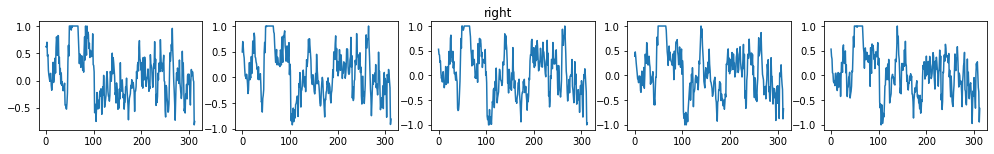

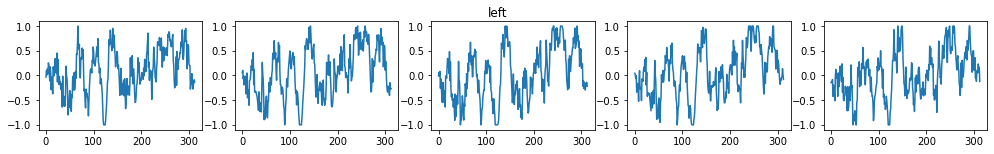

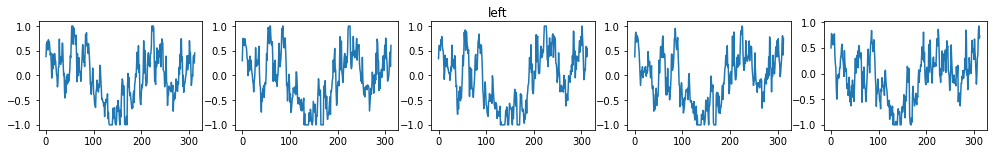

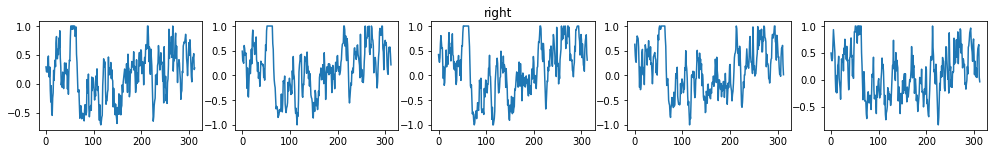

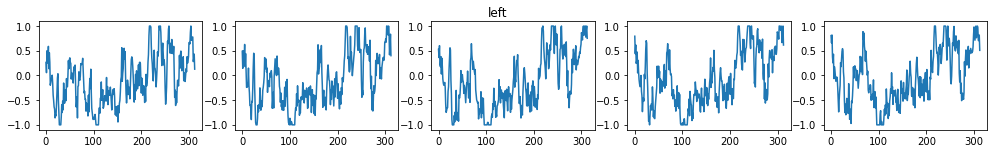

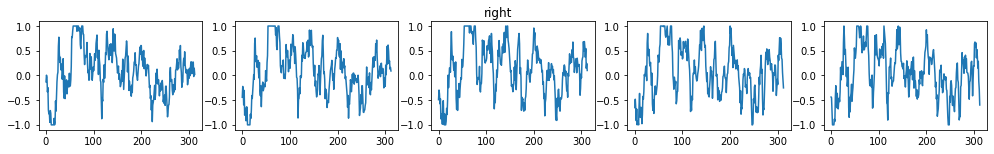

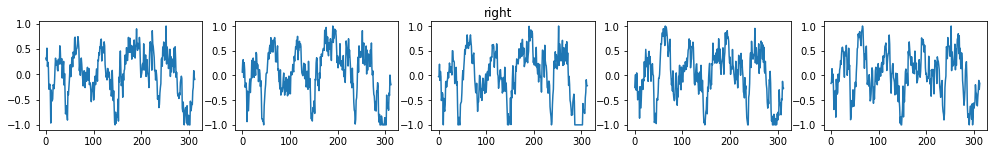

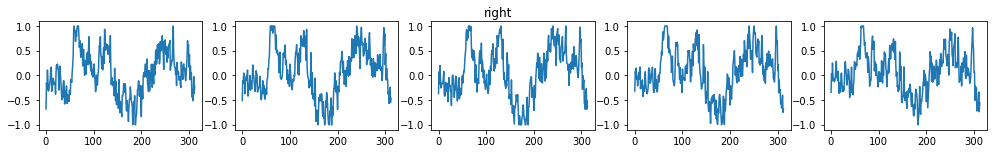

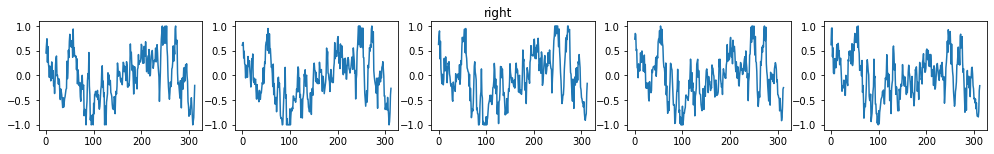

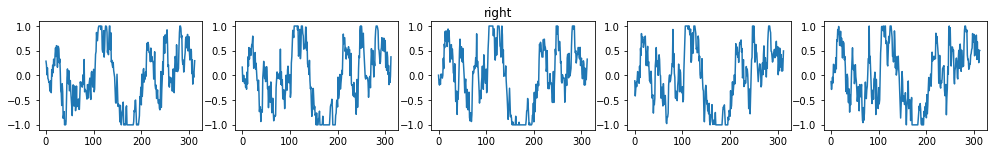

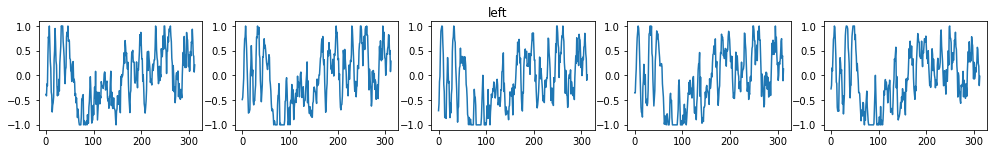

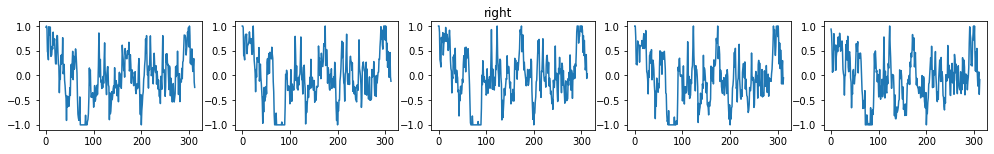

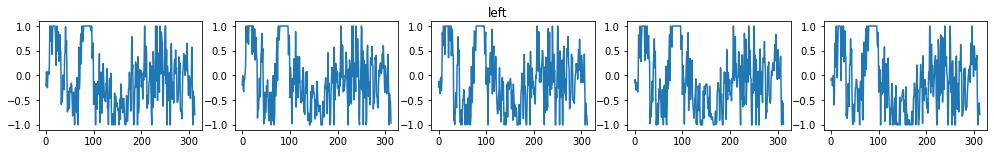

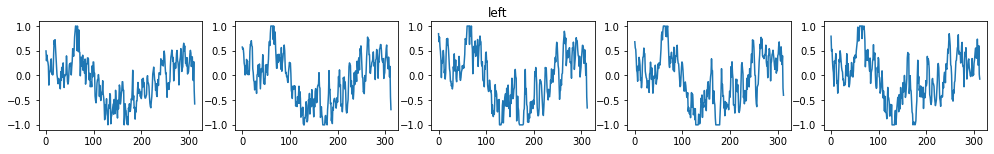

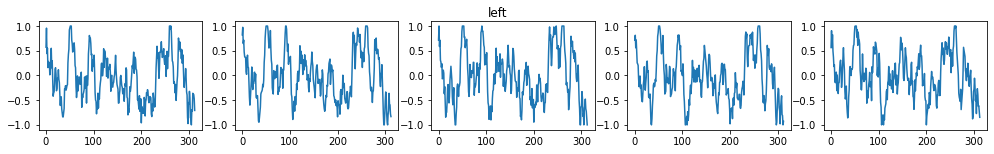

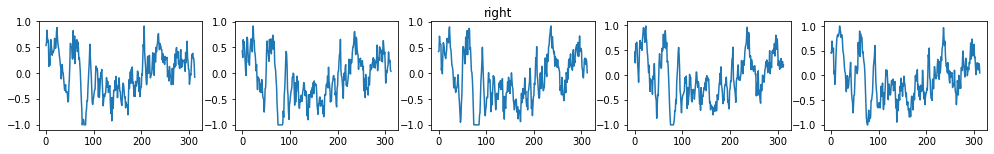

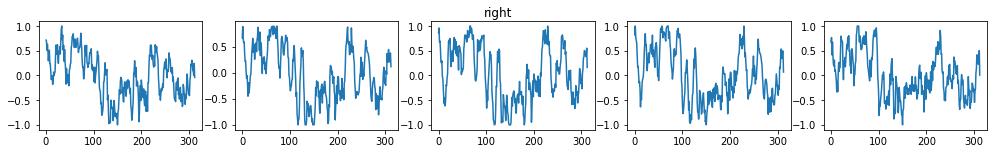

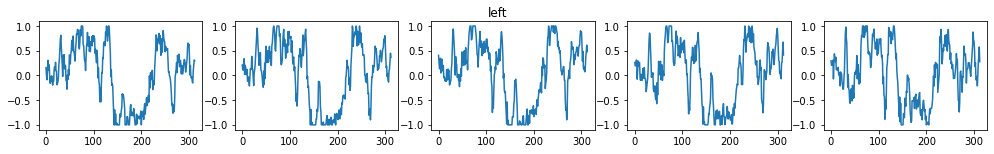

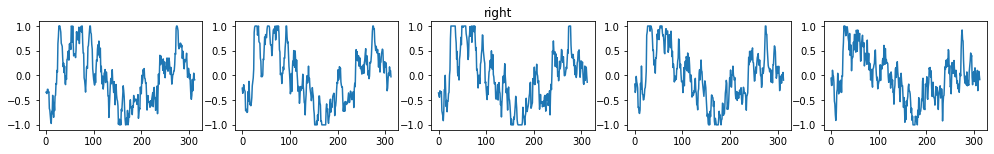

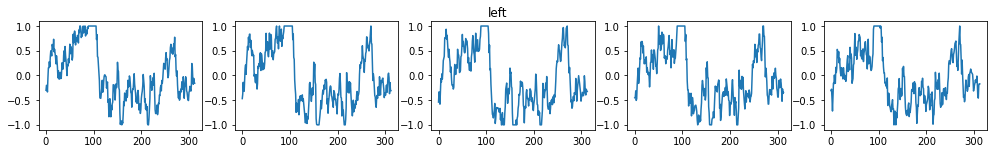

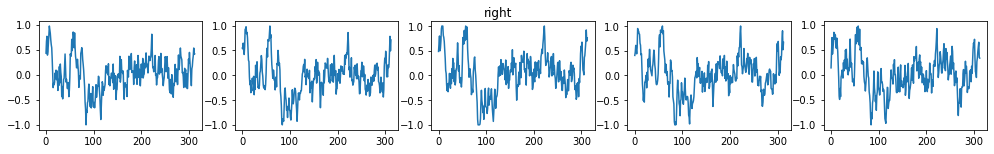

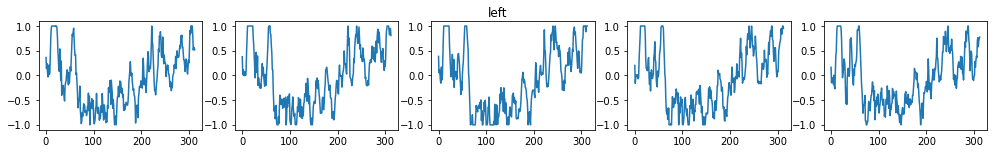

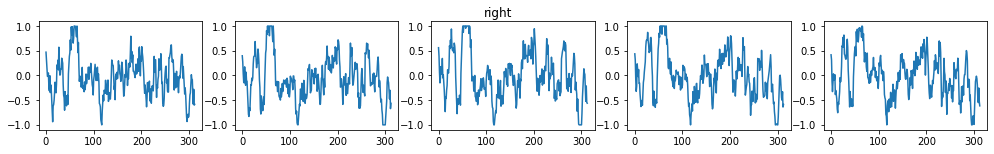

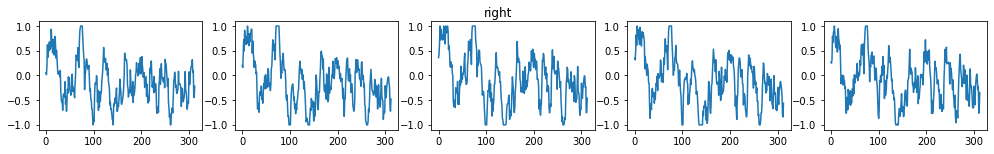

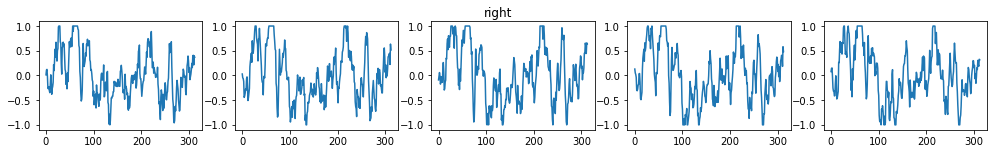

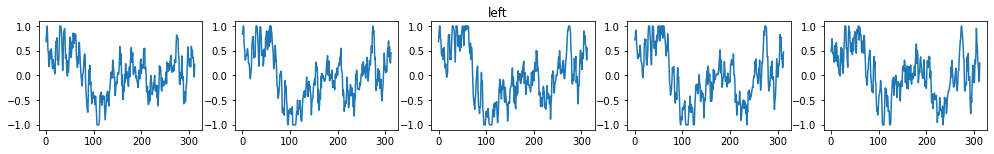

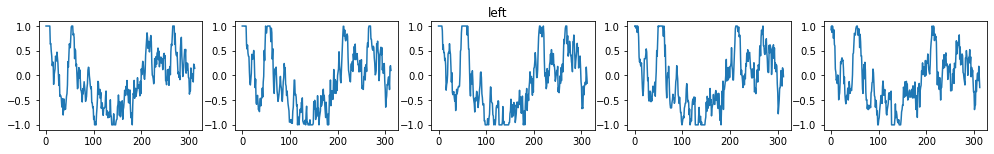

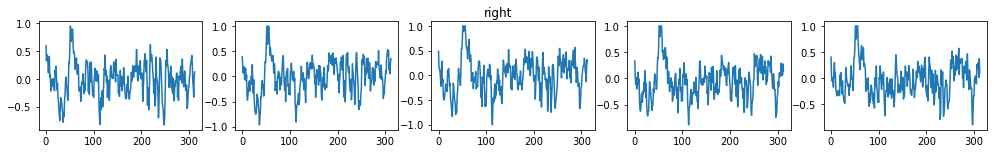

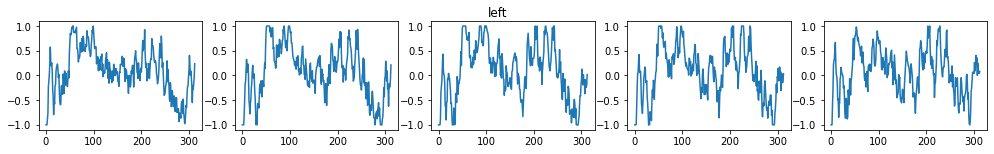

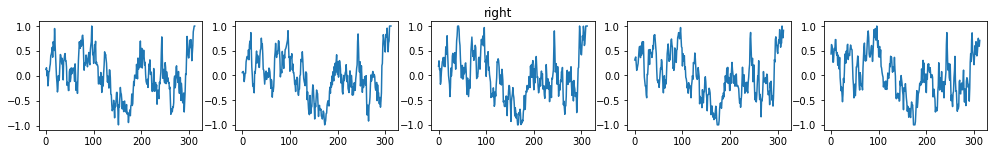

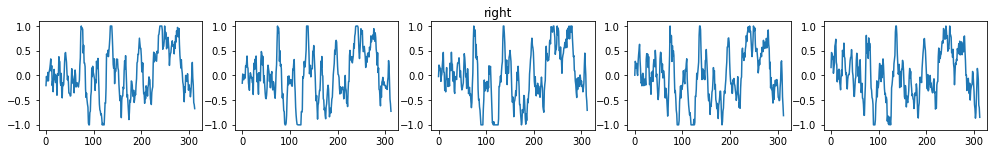

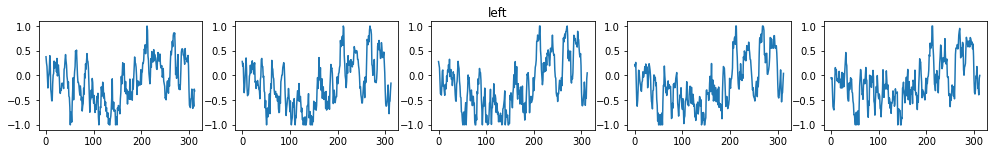

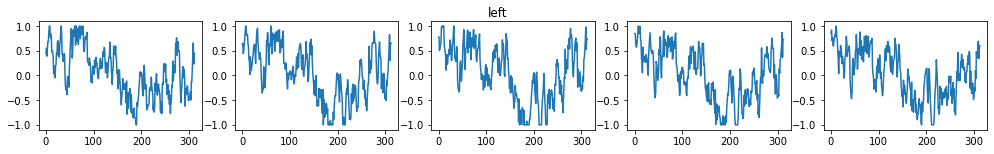

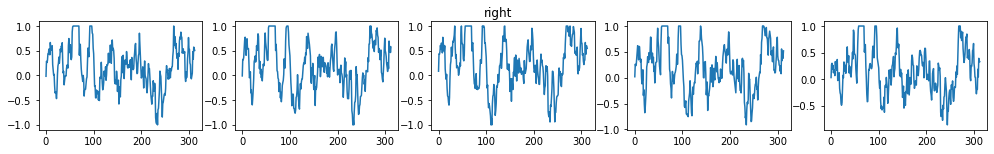

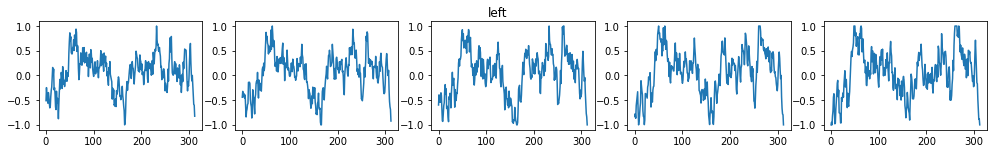

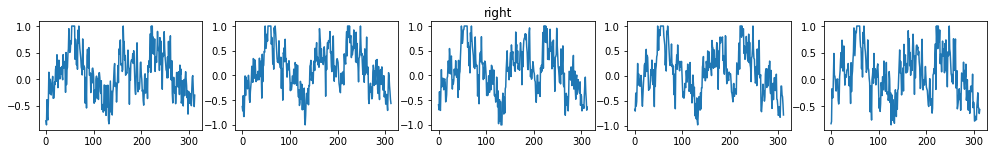

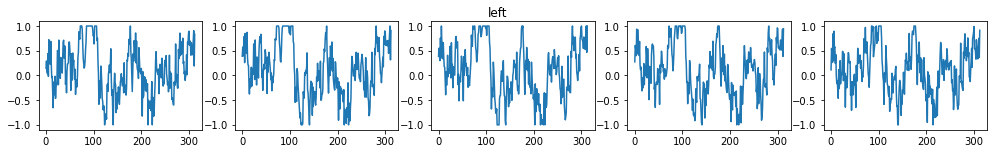

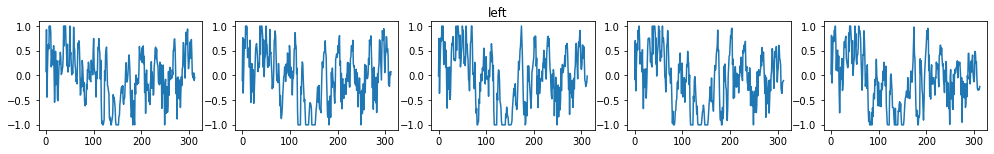

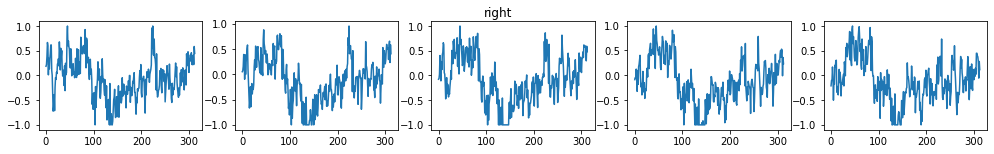

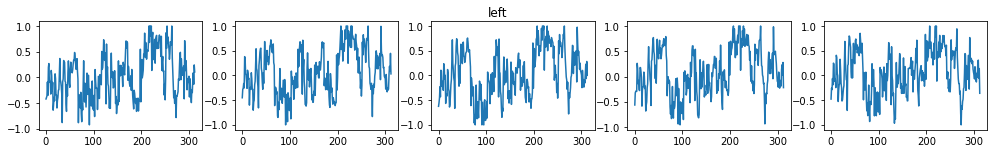

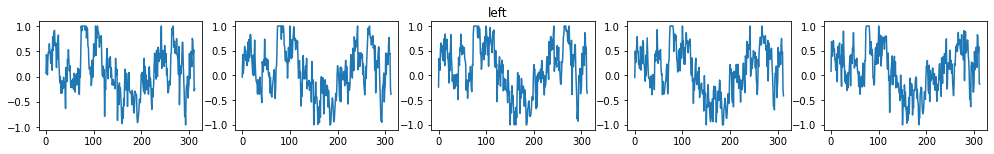

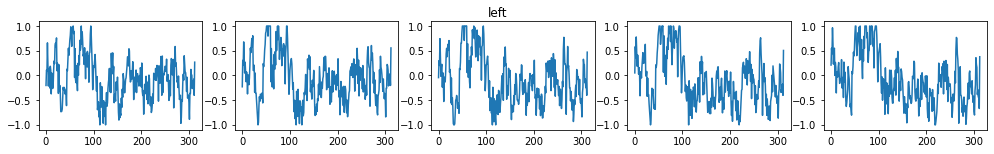

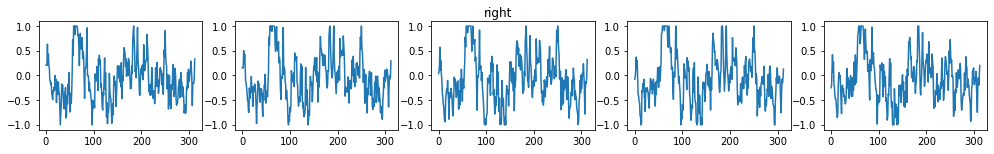

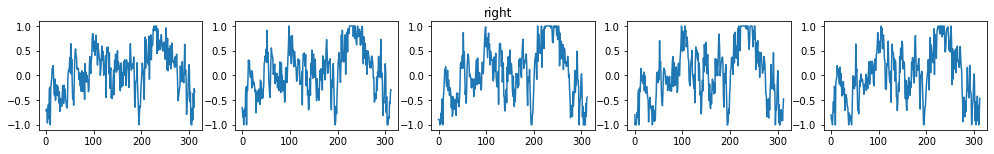

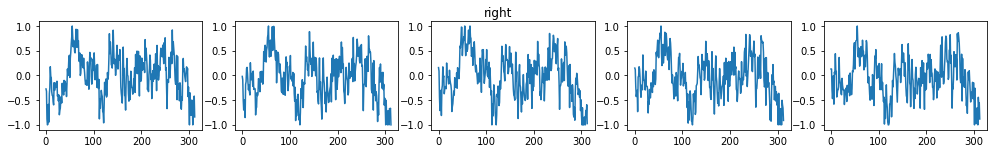

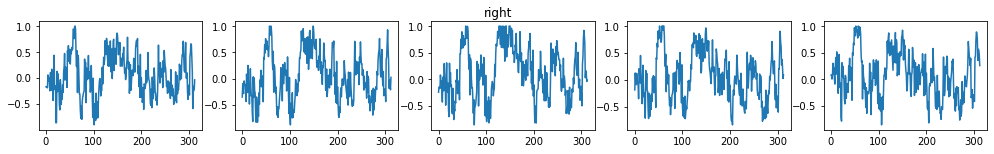

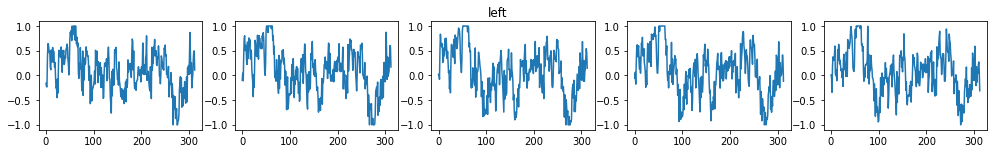

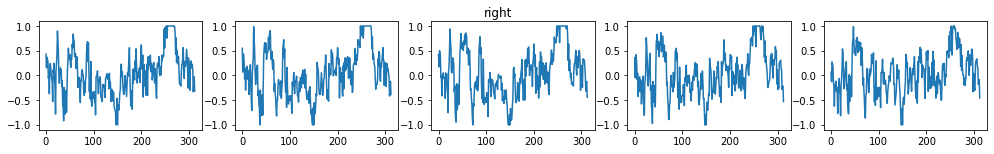

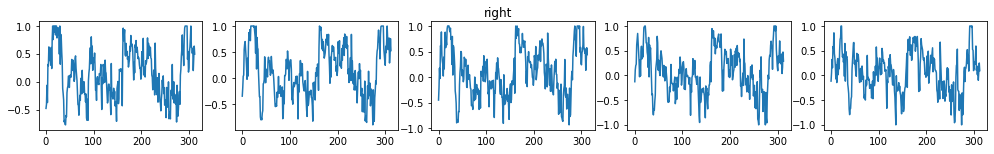

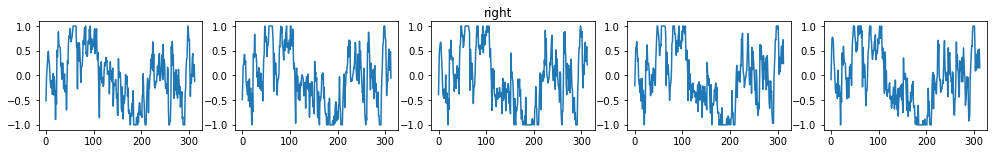

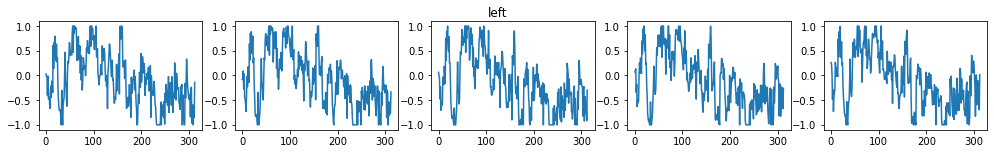

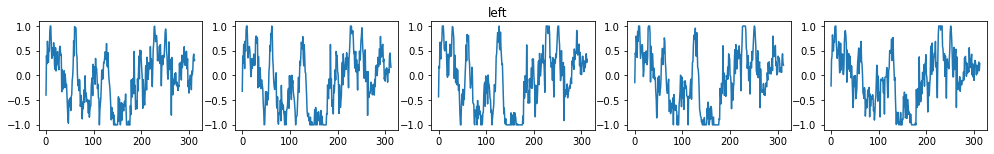

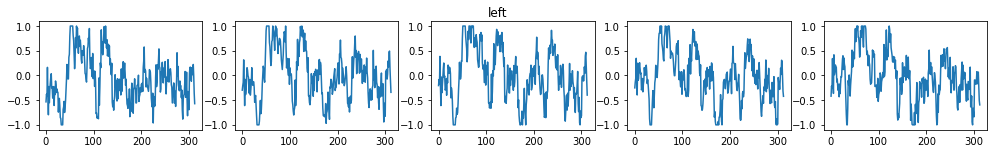

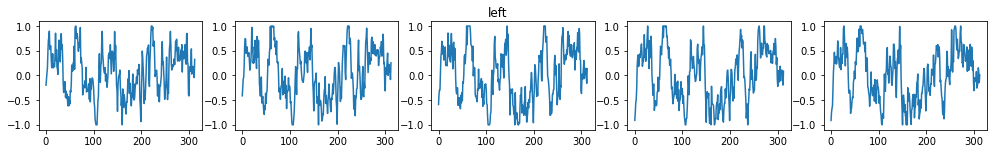

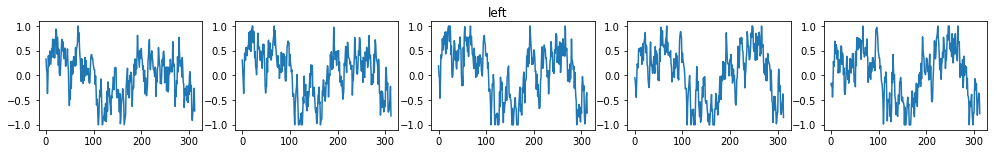

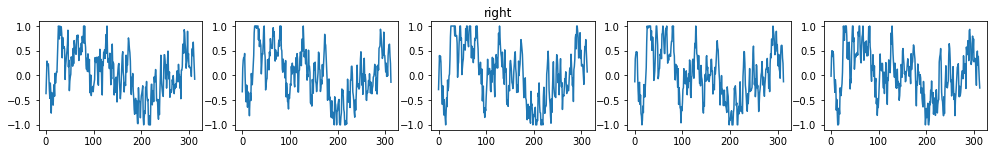

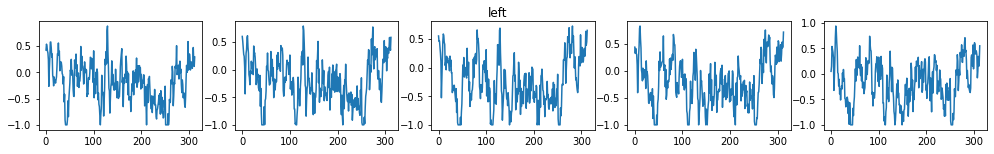

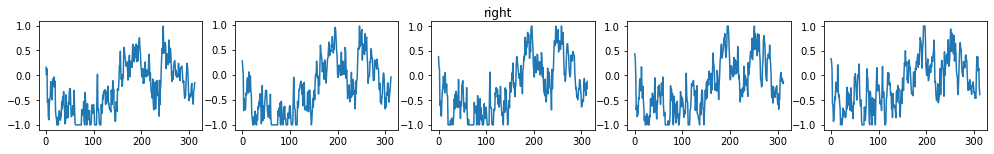

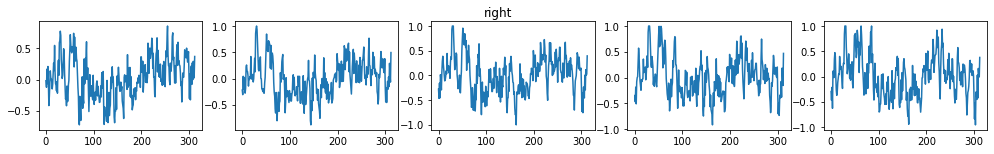

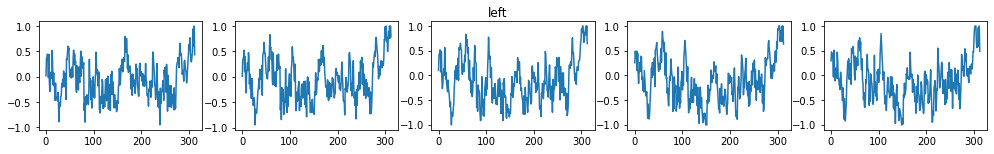

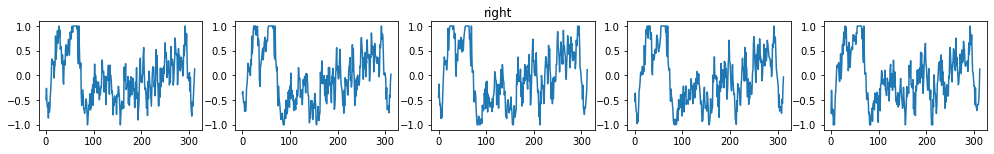

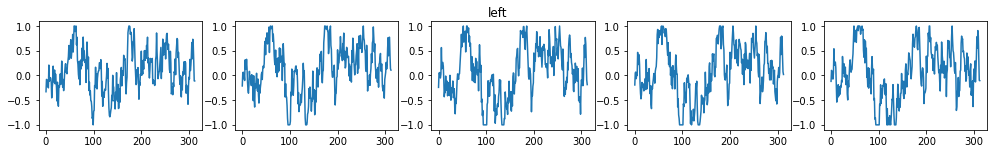

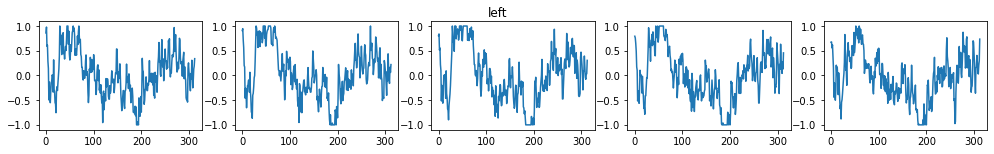

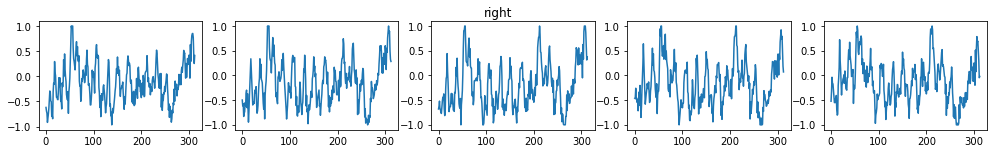

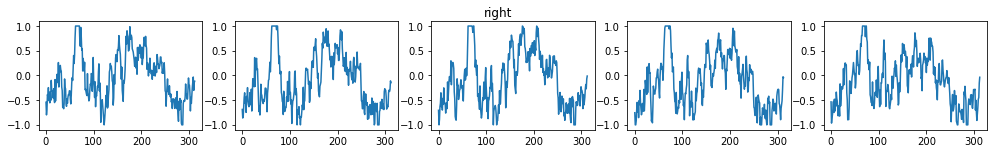

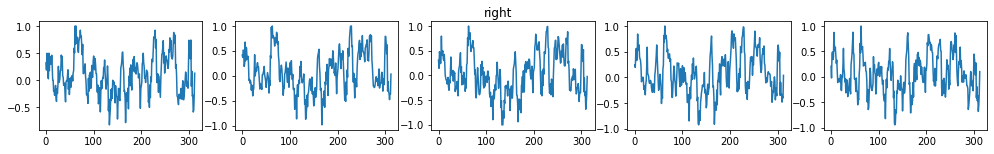

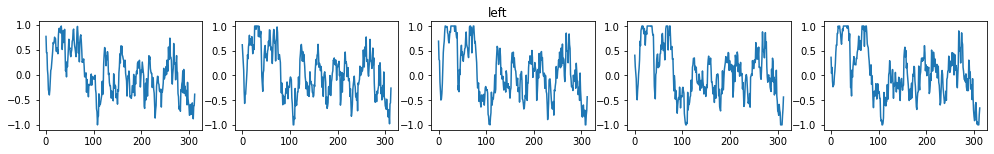

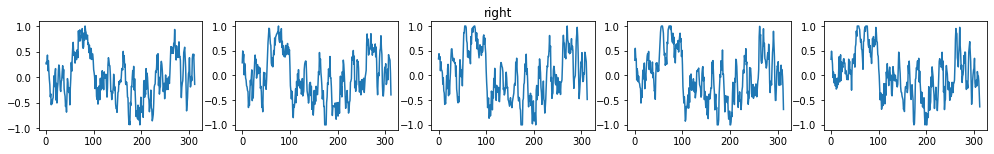

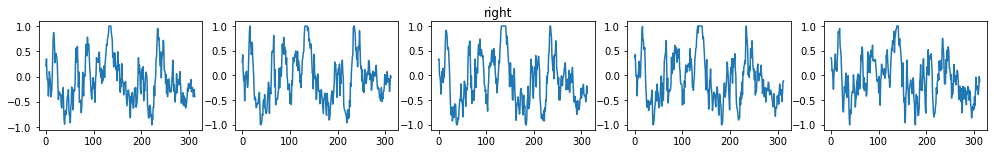

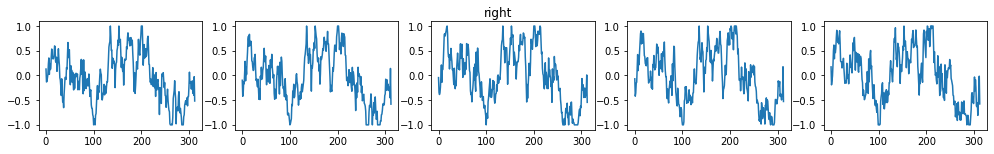

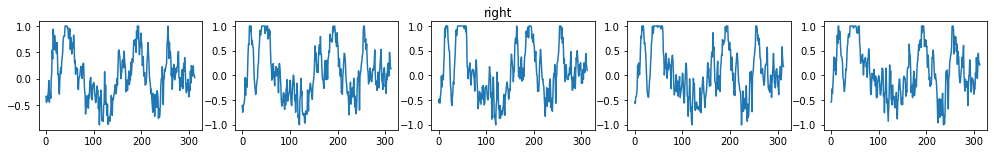

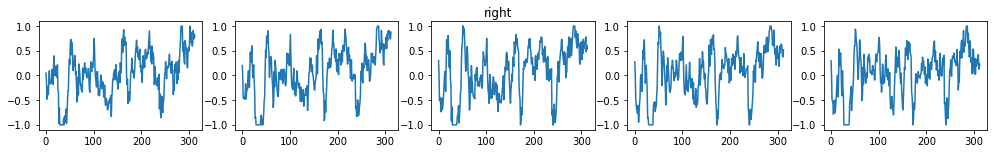

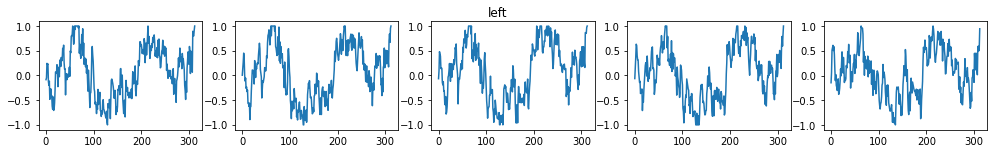

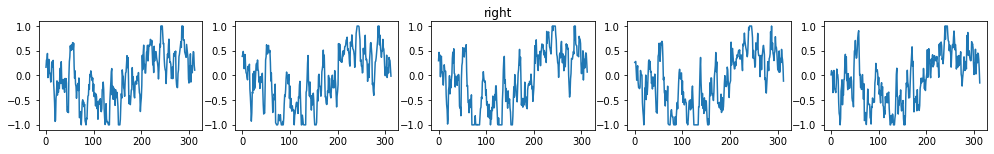

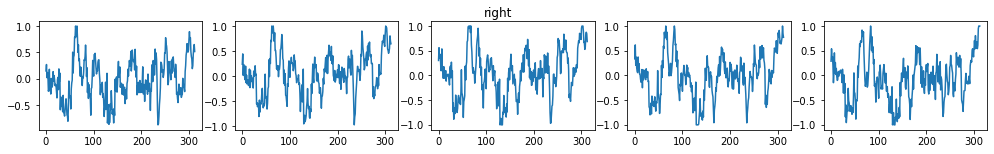

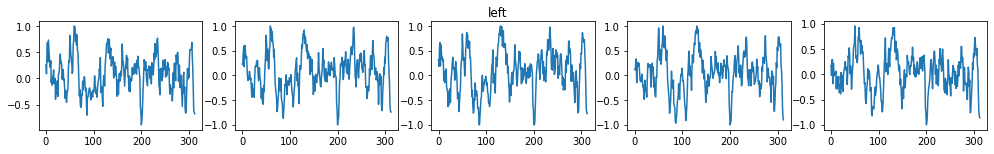

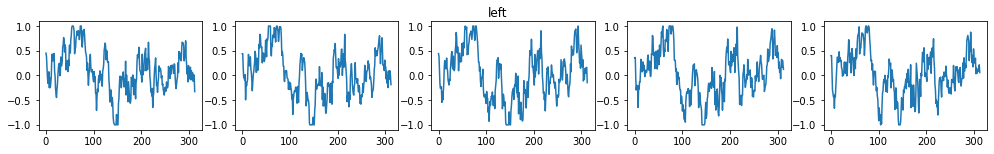

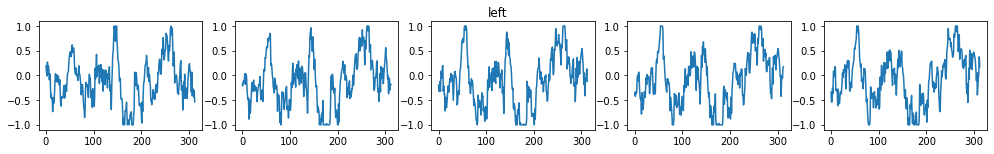

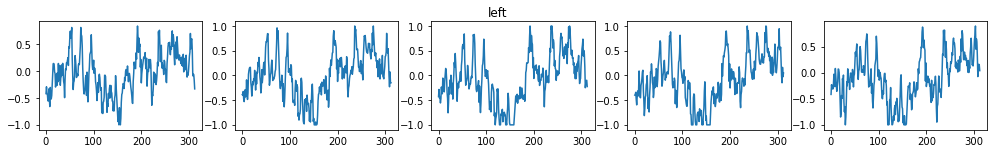

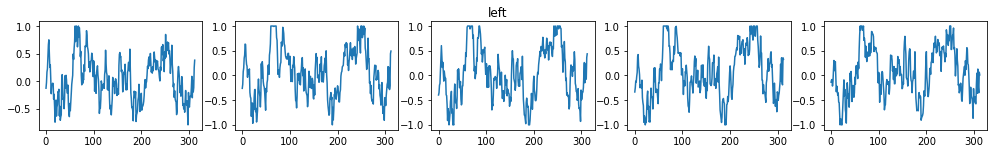

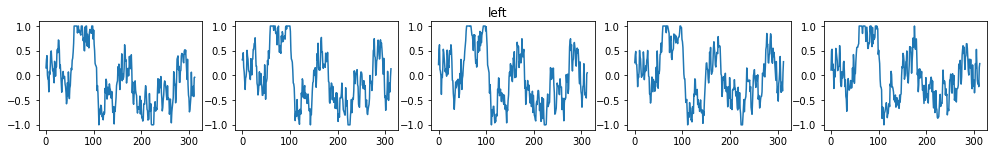

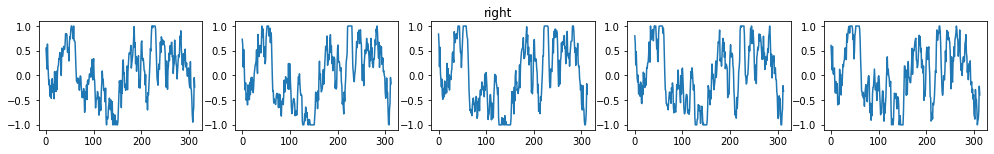

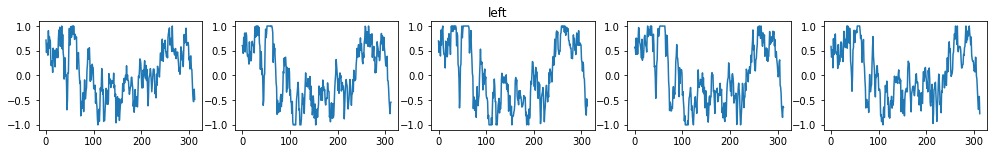

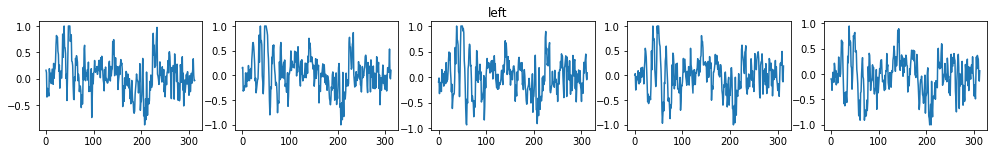

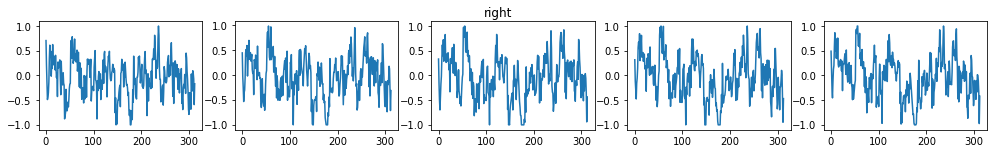

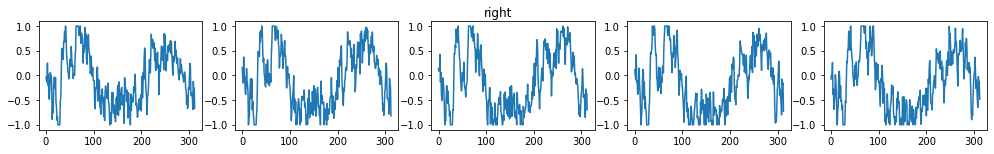

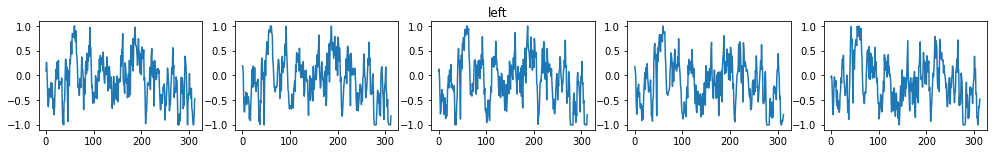

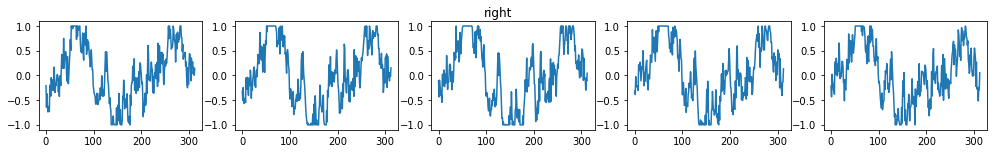

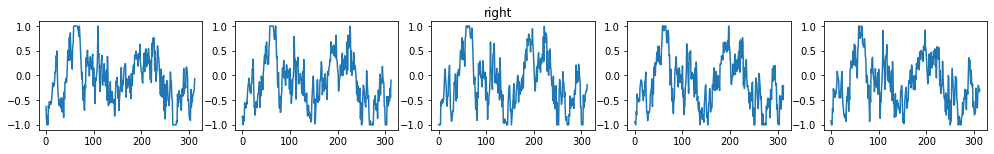

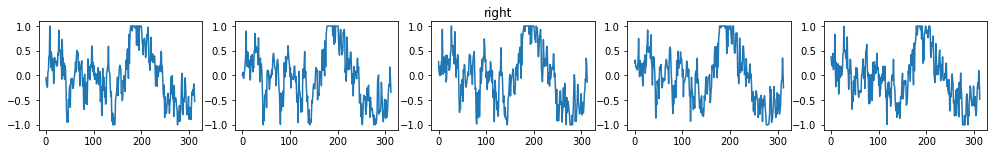

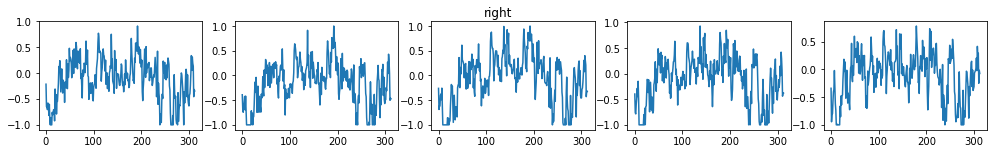

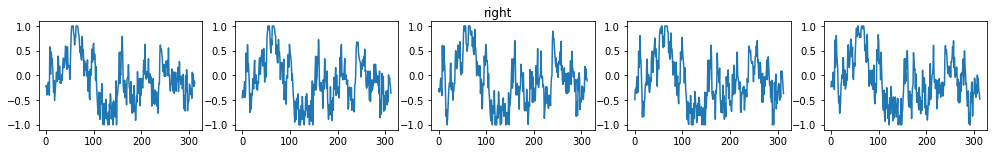

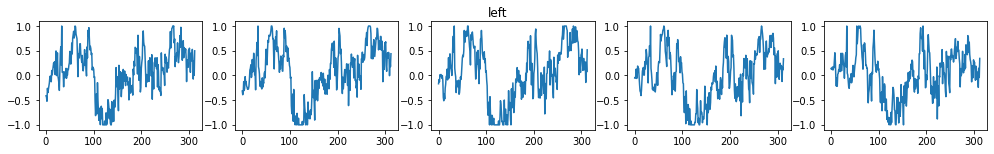

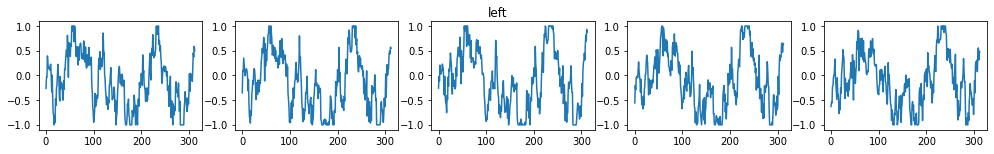

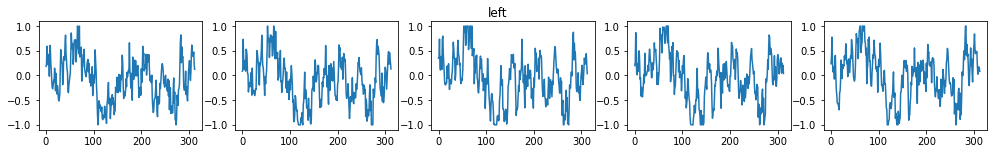

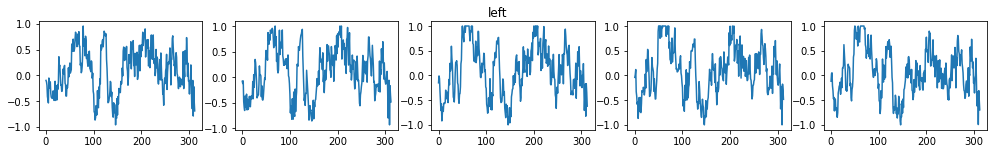

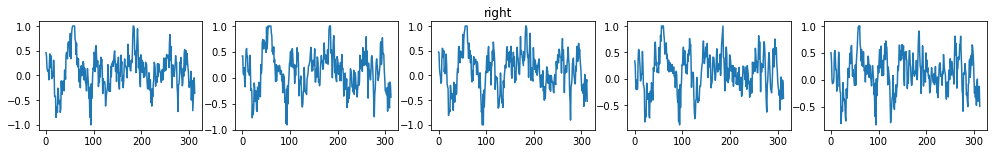

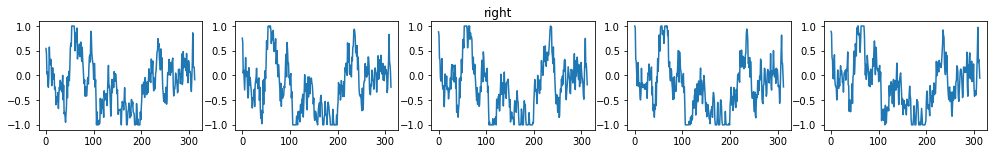

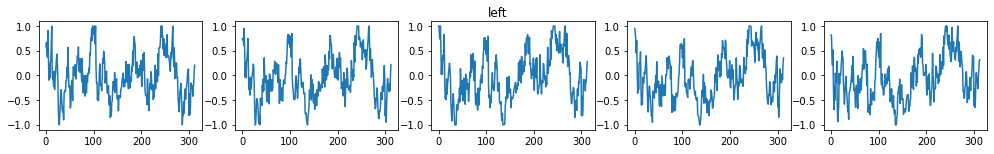

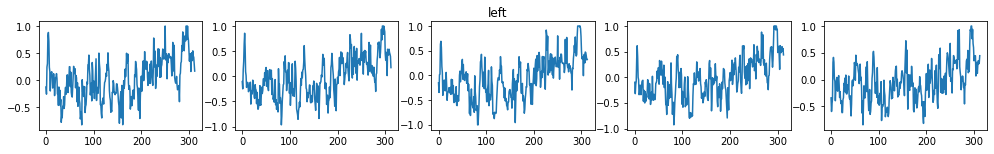

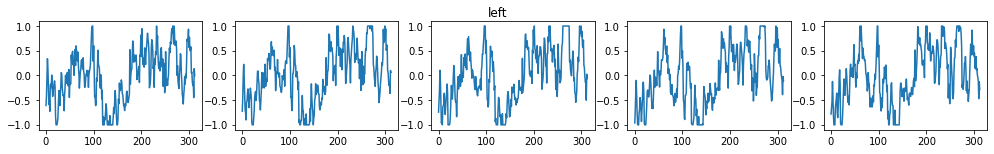

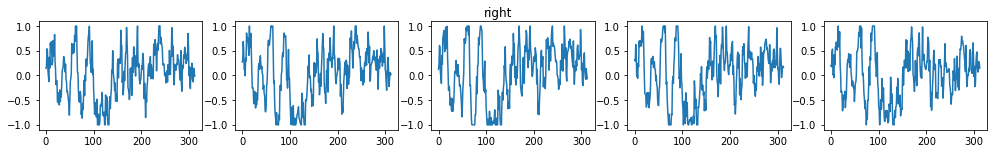

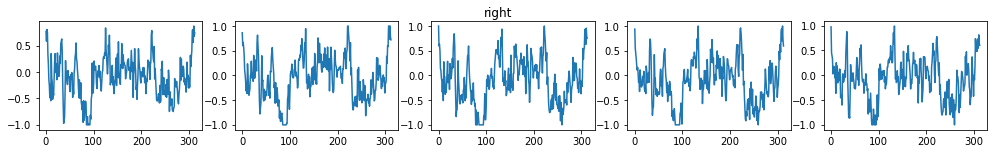

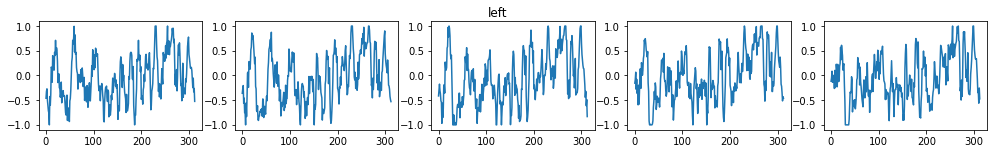

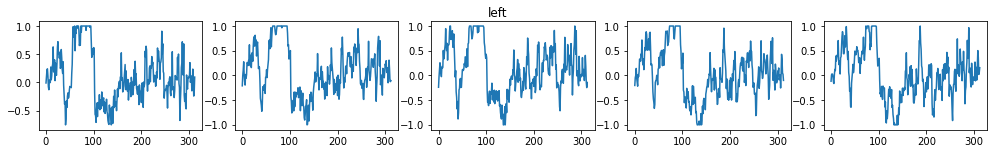

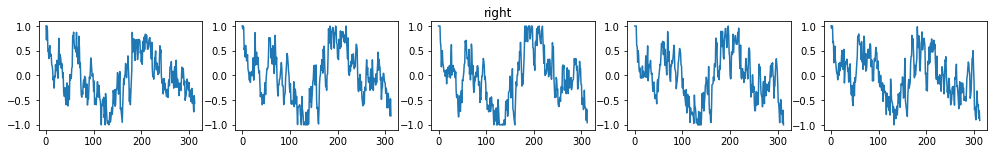

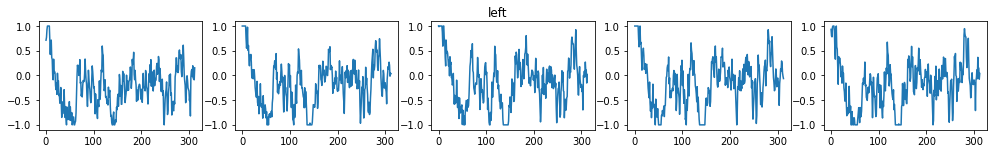

In [119]:
for i in range(len(X)):
    showEvent(X[i],y[i])

In [121]:
#SHUFFLE INCLUDED
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=16)
#X_train, X_valid, y_train, y_valid = train_test_split(np.vstack(X), np.vstack(Y), test_size=0.1, random_state=816)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(129, 313, 5)
(15, 313, 5)
(129, 2)
(15, 2)


In [122]:
print(y_train)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 

In [123]:
print(X_train[0])
#for asd in X_train[0]:
#    print(asd)

[[0.18310547 0.08544922 0.34912109 0.20019531 0.23681641]
 [0.21972656 0.10009766 0.3515625  0.26123047 0.40527344]
 [0.59326172 0.73242188 0.73486328 0.86669922 0.77636719]
 ...
 [0.47363281 0.36376953 0.44189453 0.16845703 0.17333984]
 [0.20996094 0.25390625 0.23925781 0.20507812 0.15380859]
 [0.12451172 0.13183594 0.03662109 0.0390625  0.08300781]]


In [124]:
def get_model():
    inspected_chanles=signal.shape[1]
    signal_length=313
    input_layer = keras.Input(shape = (signal_length,inspected_chanles,1), name='input')
    x     = layers.Conv2D(64, kernel_size=(5,1), padding='same', activation='relu')(input_layer)
    x     = layers.Conv2D(32, kernel_size=(1,5), padding='same', activation='relu')(x)
    x     = layers.Conv2D(16, 16, padding='same', activation='relu')(x)
    x     = layers.Conv2D(8, 8, padding='same', activation='relu')(x)
    x     = layers.Conv2D(4, 4, padding='same', activation='relu')(x)
    x     = layers.GlobalAveragePooling2D()(x)
    x     = layers.Dense(8)(x)
    x     = layers.Dense(64)(x)
    output = layers.Dense(len(event_codes), activation='softmax')(x)
    #output = layers.Dense(1, activation='softmax')(x)

    model = keras.Model(inputs=input_layer, outputs=output)

    model.summary()
    return model

In [125]:
def get_dummy_model():
    inspected_chanles=signal.shape[1]
    signal_length=313
    input_layer = keras.Input(shape = (signal_length,inspected_chanles,1), name='input')
    x     = layers.GlobalAveragePooling2D()(input_layer)
    x     = layers.Dense(100)(x)

    output = layers.Dense(2, activation='softmax')(x)

    model = keras.Model(inputs=input_layer, outputs=output)

    model.summary()
    return model

In [133]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

#strategy = tf.distribute.MirroredStrategy()
#print('Number of devices: {}'.format(strategy.num_replicas_in_sync))
#with strategy.scope():

model = get_model()
#model = get_dummy_model()

opt = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,
          #loss='binary_crossentropy',
          loss='categorical_crossentropy',
          metrics=['accuracy'])


history = model.fit(X,
                    y,
                    validation_data=(X_valid, y_valid),
                    batch_size=32,
                    epochs=200)


Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 313, 5, 1)]       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 313, 5, 64)        384       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 313, 5, 32)        10272     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 313, 5, 16)        131088    
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 313, 5, 8)         8200      
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 313, 5, 4)         516       
_________________________________________________________________
global_average_pooling2d_9 ( (None, 4)               

5/5 [==============================] - 0s 29ms/step - loss: 0.5552 - accuracy: 0.7292 - val_loss: 0.4012 - val_accuracy: 0.8000
Epoch 104/200
5/5 [==============================] - 0s 29ms/step - loss: 0.5479 - accuracy: 0.7292 - val_loss: 0.3834 - val_accuracy: 0.7333
Epoch 105/200
5/5 [==============================] - 0s 30ms/step - loss: 0.5579 - accuracy: 0.7153 - val_loss: 0.3785 - val_accuracy: 0.7333
Epoch 106/200
5/5 [==============================] - 0s 29ms/step - loss: 0.5482 - accuracy: 0.7014 - val_loss: 0.3697 - val_accuracy: 0.7333
Epoch 107/200
5/5 [==============================] - 0s 29ms/step - loss: 0.5255 - accuracy: 0.7639 - val_loss: 0.3878 - val_accuracy: 0.8000
Epoch 108/200
5/5 [==============================] - 0s 30ms/step - loss: 0.5160 - accuracy: 0.7500 - val_loss: 0.3654 - val_accuracy: 0.8667
Epoch 109/200
5/5 [==============================] - 0s 29ms/step - loss: 0.5085 - accuracy: 0.7708 - val_loss: 0.4153 - val_accuracy: 0.8667
Epoch 110/200
5/5 [=

Epoch 161/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0779 - accuracy: 0.9722 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 162/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0612 - accuracy: 0.9861 - val_loss: 0.0354 - val_accuracy: 1.0000
Epoch 163/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0411 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 164/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0237 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 165/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 166/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 167/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 

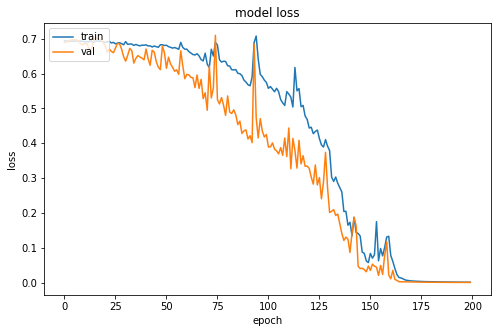

In [172]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

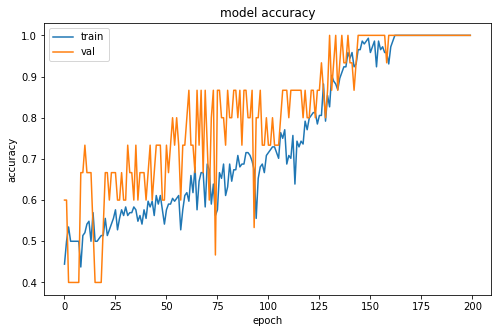

In [173]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
##############################################################################
############                     PREDICT                     #################
##############################################################################

In [163]:
for data in eval_datas:
    max_length=0
    signal = data['s']
    
    #REMOVE EOG
    signal=np.delete(signal,EOG_electrodes,axis=1)
    
    #USE ONLY ELECTRODES OVER MOTOR CORTEX
    signal = signal[:,primary_motor_cortex_electrodes]

    #FILTER BANDWIDTH
    signal=np.clip(signal,-20,20)
    
    signal=np.divide(signal, 20)
    #signal+=0.5
    
    
    event_count=data['etyp'].shape[0]
    
    for x in range(event_count): 
        epos = data['epos'].T[0, x]
        edur = data['edur'].T[0, x]
        etype= data['etyp'].T[0, x]
        if edur>10:
            trial = signal[epos:epos+edur]
            input_data=np.expand_dims(trial, axis=0)
            input_data=np.expand_dims(input_data, axis = -1)
            result = model.predict(input_data)[0]
            prediction = np.where(result == np.amax(result))[0][0]
            print(prediction)
   
    break

1
0
0
0
0
1
1
1
1
0
1
0
0
0
1
1
1
1
1
1
1
0
0
0
0
0
1
1
1
1
1
0
1
0
0
0
1
1
0
0
0
1
1
1
1
1
0
1
1
0
0
1
1
0
1
1
1
0
1
1
1
0
0
1
0
1
1
0
1
1
1
1
1
0
0
0
1
1
1
1
1
1
0
0
1
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
1
1
0
0
0
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
0
1
1
1
1
0
1
0
0
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
0
0
0
1
1
1
1
1
1
0
1
1
1
1
1
0
1
0
1
0
0
0
0
0
1
1
1
1
1
1
1
0
0
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
0
0
1
0
0
1
1
0
1
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
1
1
0
1
0
1
0
0
0
1
1
1
0
1
1
1
1
0
0
1
1
0
1
0
0
0
1
0
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
0
1
1
0
1
1
1
0
1
1
0
0
1
0
0
1
0
1
1
1
0
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
0
1
0
1
1
1
1
0
0
0
0
0
1
1
0
0
0
1
0
1
1
1
1
1
0
1
0
0
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
0
1
1
0
0
0
1
1
0
1
1
0
1
1
0
0


In [ ]:
for data in train_datas:  
    #data=train_datas[0]
    summ=0
    correct=0
    incorrect=0
    max_length=0
    signal = data['s']

    #REMOVE EOG
    signal=np.delete(signal,EOG_electrodes,axis=1)

    #USE ONLY ELECTRODES OVER MOTOR CORTEX
    signal = signal[:,primary_motor_cortex_electrodes]

    #FILTER BANDWIDTH
    signal=np.clip(signal,-20,20)

    signal=np.divide(signal, 20)
    #signal+=0.5


    event_count=data['etyp'].shape[0]

    for x in range(event_count): 
        epos = data['epos'].T[0, x]
        edur = data['edur'].T[0, x]
        etype= data['etyp'].T[0, x]
        if edur>10:
            if int(etype) in event_codes:
                trial = signal[epos:epos+edur]
                input_data=np.expand_dims(trial, axis=0)
                input_data=np.expand_dims(input_data, axis = -1)
                result = model.predict(input_data)[0]
                prediction = np.where(result == np.amax(result))[0][0]

                #print(result)
                #print(prediction)
                gt=event_codes.index(etype)
                #print(gt)
                #print(gt==prediction)
                summ+=1
                if gt==prediction:
                    correct+=1
                else:
                    incorrect+=1
                #print()
    print("SUMM:{} | correct: {} | incorrect: {}".format(summ, correct, incorrect))
    print("Accuracy: {}%".format(round((correct/summ)*100,2)))


In [129]:
!nvidia-smi

Fri Apr 30 17:05:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 461.92       Driver Version: 461.92       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 106... WDDM  | 00000000:01:00.0 Off |                  N/A |
|  0%   39C    P8     6W / 120W |     92MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 106... WDDM  | 00000000:03:00.0  On |                  N/A |
| 33%   